In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import quantumpropagator as qp
from quantumpropagator import readWholeH5toDict, abs2
#from __future__ import print_function
from ipywidgets import interact#, interactive, fixed, interact_manual
import ipywidgets as widgets

interactive = False

In [2]:
subfolders = sorted([ dir for dir in os.listdir('.') if os.path.isdir(dir) and dir != '.ipynb_checkpoints'])
print(''.join(['{} -> {}\n'.format(a,b) for a,b in enumerate(subfolders)]))

0 -> aaa_input_FinerGrid_0027
1 -> aaa_input_FinerGrid_0031
2 -> bbb_finerfinergrid_exploding
3 -> bbb_finergrid_3d_withoutpotential
4 -> distort_input_FinerGrid_0000
5 -> distort_input_FinerGrid_0001
6 -> distort_input_FinerGrid_0002
7 -> distort_input_FinerGrid_0003
8 -> distort_input_FinerGrid_0004
9 -> distort_input_FinerGrid_0005
10 -> distort_input_FinerGrid_0006
11 -> distort_input_FinerGrid_0007
12 -> distort_input_FinerGrid_0008
13 -> distort_input_FinerGrid_0009
14 -> distort_input_FinerGrid_0010
15 -> distort_input_FinerGrid_0011
16 -> distort_input_FinerGrid_0012
17 -> distort_input_FinerGrid_0013
18 -> distort_input_FinerGrid_0014
19 -> distort_input_FinerGrid_0015
20 -> distort_input_FinerGrid_0016
21 -> distort_input_FinerGrid_0017
22 -> distort_input_FinerGrid_0018
23 -> distort_input_FinerGrid_0019
24 -> distort_input_FinerGrid_0020
25 -> distort_input_FinerGrid_0021
26 -> distort_input_FinerGrid_0022
27 -> distort_input_FinerGrid_0023
28 -> distort_input_FinerGrid_002

In [3]:
a = subfolders[-1]
#a = subfolders[31]

In [4]:
filesList = [ fn for fn in sorted(os.listdir(a)) if fn[:8] == 'Gaussian' and fn[-3:] == '.h5']
outh5 = os.path.join(a,'allInput.h5')
dictio = readWholeH5toDict(outh5)
kind = dictio['kind']
phis,gams,thes = dictio['phis'],dictio['gams'],dictio['thes']
lastV = len(filesList)-1

In [5]:
kind

'Gam'

# 1d slices

In [6]:
filesN = len(filesList)
dime,nstates = (qp.retrieve_hdf5_data(os.path.join(a,filesList[0]),'WF')).shape
allwf = np.empty((filesN,dime,nstates),dtype=complex)
alltime = np.empty((filesN))
if kind == 'Phi':
    dim = phis
elif kind == 'Gam':
    dim = gams

In [7]:
for i,fn in enumerate(filesList):
    fnn = os.path.join(a,fn)
    allwf[i] = qp.retrieve_hdf5_data(fnn,'WF')
    alltime[i] = qp.retrieve_hdf5_data(fnn,'Time')[0]
    

In [8]:
def sliceGammas(i):
    wf = allwf[i]
    fig = plt.figure(figsize=(11, 6), dpi= 80, facecolor='w', edgecolor='k')
    ys = wf
    time = alltime[i]
    plt.title('{} - Time = {:10.5f} fs'.format(kind,time))
    plt.ylim(-0.7,0.7)
    plt.plot(dim, np.real(ys), linewidth=1,ls='--')
    plt.plot(dim, np.imag(ys), linewidth=1,ls='--')
    plt.plot(dim, abs2(ys), linewidth=3,ls='-')

def fdim(file_number):
    return sliceGammas(file_number)


initial
final


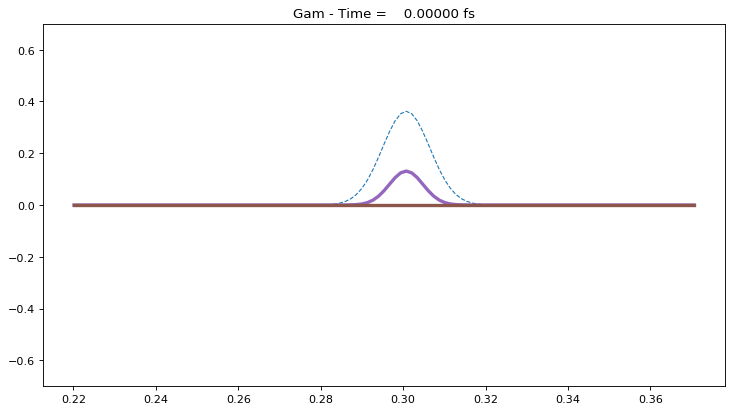

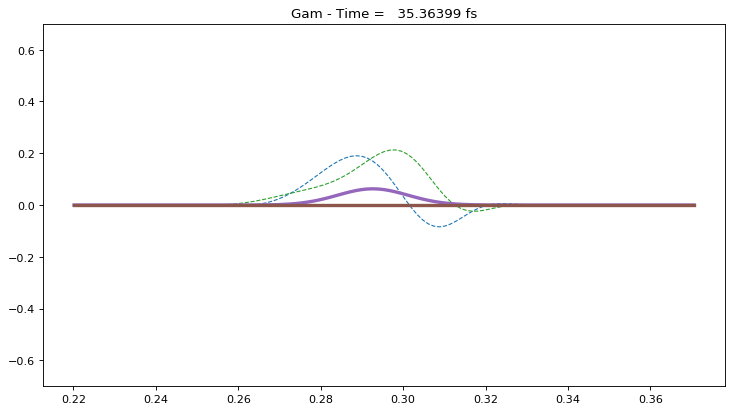

In [9]:
if interactive:
    interact(fdim, file_number = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV));
else:
    print('initial')
    fdim(0)
    print('final')
    fdim(lastV)

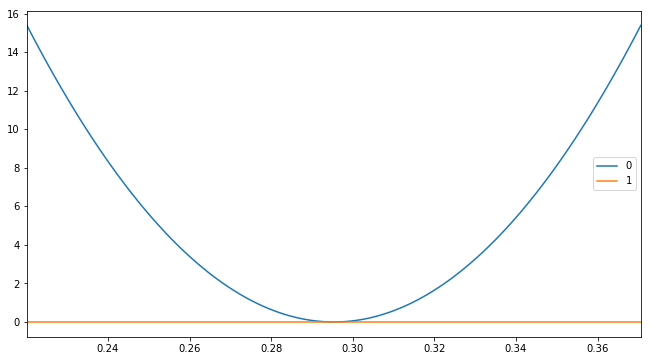

In [10]:
pd.DataFrame(qp.fromHartoEv(dictio['potCube'])).plot(x=dim,figsize=(11, 6));

In [11]:
def kinGam(xder):
    pd.DataFrame(dictio['kinCube'][:,4,xder]).plot(x=dim,figsize=(11, 6))
    
interact(kinGam, xder = widgets.IntSlider(min=0,max=2,step=1,value=0));

interactive(children=(IntSlider(value=0, description='xder', max=2), Output()), _dom_classes=('widget-interact…

In [12]:
outfn = os.path.join(a,'output')
outfnP = os.path.join(a,'outputPopul')
data = pd.read_csv(outfn, delim_whitespace=True, header=None);
dataP = pd.read_csv(outfnP, delim_whitespace=True, header=None);
data.columns = ['count','steps','fs','Norm Deviation','Kinetic','Potential','Total','Total deviation','Xpulse','Ypulse','Zpulse']

In [13]:
result = pd.concat([data, dataP], axis=1)
result

,count,steps,fs,Norm Deviation,Kinetic,Potential,Total,Total deviation,Xpulse,Ypulse,Zpulse,0,1,2
0,0,0,0.000000,0.000000e+00,0.251330,0.123833,0.375162,0.000000e+00,0.0,0.0,0.0,0.0000,1.000000,0.0
1,1,500,0.500496,2.848516e-06,0.238372,0.136788,0.375160,2.238704e-06,0.0,0.0,0.0,0.5005,0.999994,0.0
2,2,1000,1.000993,1.118081e-05,0.204750,0.170403,0.375154,8.919014e-06,0.0,0.0,0.0,1.0010,0.999978,0.0
3,3,1500,1.501489,2.435354e-05,0.164143,0.210999,0.375143,1.989298e-05,0.0,0.0,0.0,1.5015,0.999951,0.0
4,4,2000,2.001985,4.126060e-05,0.133073,0.242055,0.375128,3.466751e-05,0.0,0.0,0.0,2.0020,0.999917,0.0
5,5,2500,2.502482,6.032989e-05,0.124166,0.250945,0.375110,5.216954e-05,0.0,0.0,0.0,2.5025,0.999879,0.0
6,6,3000,3.002978,7.961226e-05,0.141025,0.234067,0.375092,7.067503e-05,0.0,0.0,0.0,3.0030,0.999841,0.0
7,7,3500,3.503475,9.697640e-05,0.176778,0.198297,0.375074,8.796193e-05,0.0,0.0,0.0,3.5035,0.999806,0.0
8,8,4000,4.003971,1.103878e-04,0.216890,0.158171,0.375061,1.016787e-04,0.0,0.0,0.0,4.0040,0.999779,0.0
9,9,4500,4.504467,1.182125e-04,0.245066,0.129987,0.375053,1.098210e-04,0.0,0.0,0.0,4.5045,0.999764,0.0


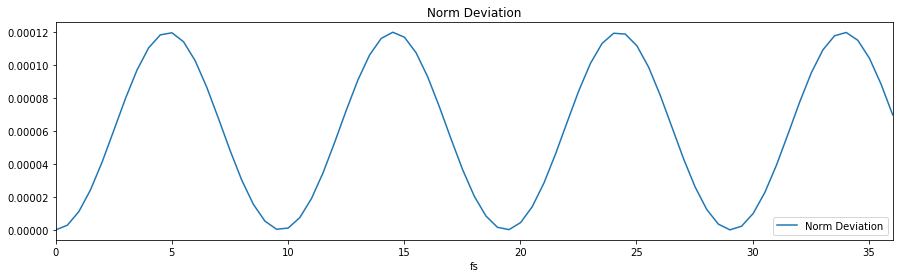

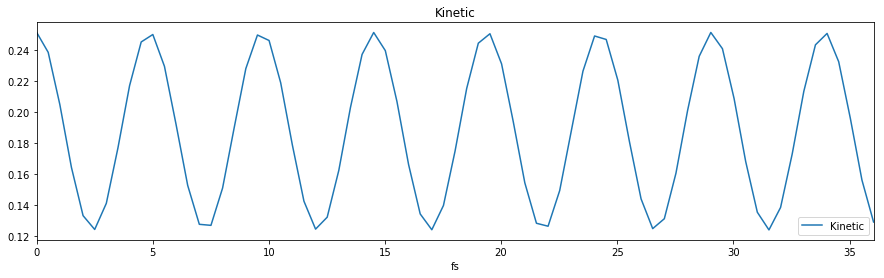

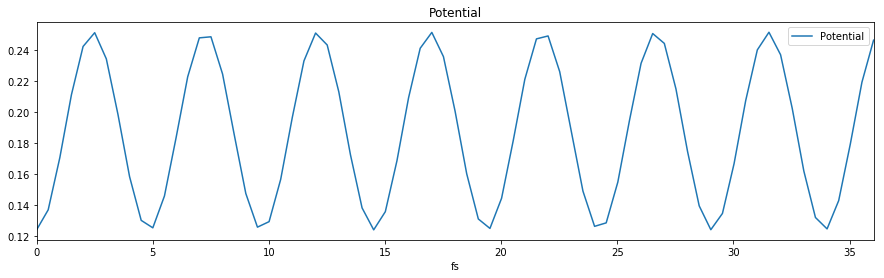

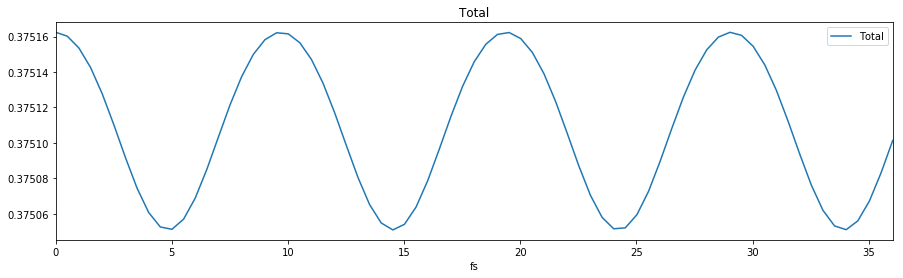

In [14]:
data.plot(title = 'Norm Deviation', x='fs', y = 'Norm Deviation', figsize=(15,4));
data.plot(title = 'Kinetic', x='fs', y = 'Kinetic', figsize=(15,4));
data.plot(title = 'Potential', x='fs', y = 'Potential', figsize=(15,4));
data.plot(title = 'Total', x='fs', y = 'Total', figsize=(15,4));

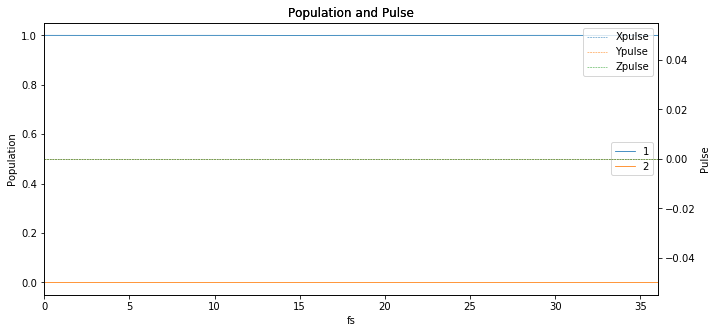

In [15]:
fig = plt.figure(figsize=(11,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.set_ylabel('Population')
ax2.set_ylabel('Pulse')
popul = np.arange(nstates)+1
result.plot(title = 'Population and Pulse', ax = ax1,  x=['fs'] ,y=popul, linewidth=0.8)
result.plot(title = 'Population and Pulse', ax = ax2,  x=['fs'] ,y=['Xpulse','Ypulse','Zpulse'], linewidth=0.5,ls='--');

## Expected Value

## Borders